# Linear Regression

This is the first assignment from Andrew Ng's Machine Learning class. In this notebook we perform linear regression with one variable and with multiple variables. 

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression with One Variable

Loading data from text file into a numpy ndarray.

In [2]:
exercise_1_data = np.genfromtxt("ex1data1.txt", delimiter=",", dtype = float)
print(exercise_1_data.shape)
exercise_1_data[0:5]

(97, 2)


array([[  6.1101,  17.592 ],
       [  5.5277,   9.1302],
       [  8.5186,  13.662 ],
       [  7.0032,  11.854 ],
       [  5.8598,   6.8233]])

Creating training data matrix X and target values y

In [3]:
X_train = exercise_1_data[:,0] 
X_train = X_train.reshape( (len(X_train),1) )
print(X_train.shape)
X_train[0:5]

(97, 1)


array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598]])

In [4]:
y_train = exercise_1_data[:,1] 
y_train = y_train.reshape( (len(y_train),1) )
print(y_train.shape)
y_train[0:5]

(97, 1)


array([[ 17.592 ],
       [  9.1302],
       [ 13.662 ],
       [ 11.854 ],
       [  6.8233]])

Plotting the data.

(-5.0, 25.0)

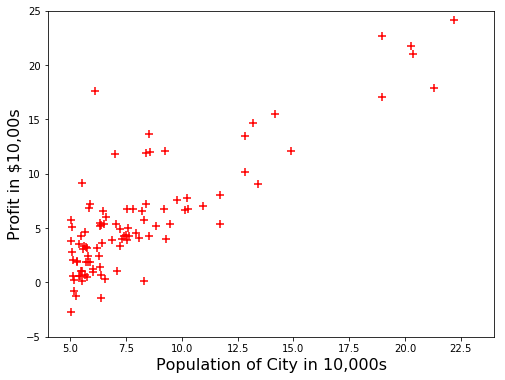

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, marker = "+", color = "red", s=70)
plt.xlabel("Population of City in 10,000s", fontsize = 16)
plt.ylabel("Profit in $10,00s", fontsize = 16)
plt.xlim((4.0,24.0))
plt.ylim((-5.0,25.0))

## Gradient Descent Function

First building helper function to make predictions given data and the weights and bias.

In [6]:
def predicted_values(bias, weights, X_data):
    
    predictions = bias + np.dot( X_data, weights )
    
    return predictions

This function takes as input the training data X_data and y_data (the target values) and the number of iterations and learning rate for gradient descent. This function returns the weights and bias learned by gradient descent and the value of the cost function after each iteration.

In [7]:
def grad_desc(X_data, y_data, N_iterations, learning_rate):
    
    # Getting the number of training examples and features from the dataset
    m_train = y_train.shape[0]
    N_features = X_data.shape[1]
    
    # Initializing all the weights and bias term to 0.0
    # The weights is a vector of dimensions ( N_features, 1 )
    weights = np.zeros( ( N_features, 1 ) , dtype = float )
    bias = 0.0
    
    # Initializing an array to hold the value of the cost function for each iteration
    J_cost = np.zeros( N_iterations + 1 , dtype = float )    
    
    # Performing gradient descent over the N_iterations
    for i in range( 0, N_iterations+1, 1):
        
        # Using the current weights to calculate the predictions and errors
        predictions = predicted_values(bias, weights, X_data)
        errors = predictions - y_data
        
        # Using the errors to calculate the cost function
        J_cost[i] = (1.0/(2.0*m_train))*np.sum( errors**2 )
        
        # Calculate db and dw, the values by which we will update the weights and bias
        db = (1.0/m_train)*np.sum( errors )
        dw = (1.0/m_train)* np.dot( X_data.T, errors )
        
        # Updating the weight and bias with db and dw times the learning rate
        bias -= learning_rate*db
        weights -= learning_rate*dw
    
    # Putting the learned parameters into a dictionary
    learned_params = { "weights": weights, "bias": bias }
    
    # Returning the learned parameters with gradient descent 
    # and the cost function after each iteration
    return learned_params, J_cost

## Best Fit Line from gradient descent

Plotting the cost function for several values of the learning rate.

/Users/rodolfosantana/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: overflow encountered in square
/Users/rodolfosantana/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in subtract


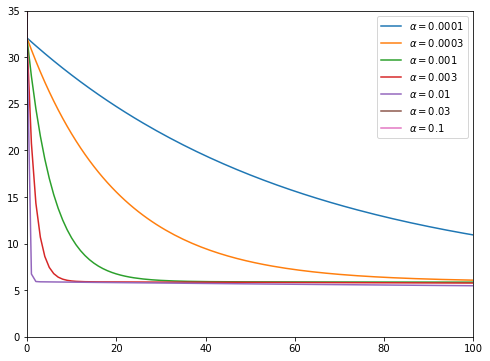

In [8]:
plt.figure(figsize=(8, 6))

learn_rate_vals = np.array([ 1.0e-4, 3.0e-4, 1.0e-3, 3.0e-3, 1.0e-2, 3.0e-2, 1.0e-1])

for i in range(len(learn_rate_vals)):
    learned_params, J_cost = grad_desc( X_data = X_train, y_data = y_train, 
                                       N_iterations = 500, learning_rate = learn_rate_vals[i])
    
    N_iterations = np.array(range(len(J_cost)))
    plt.plot(N_iterations,J_cost, label = r"$\alpha = $" + str(learn_rate_vals[i]))
    
    
plt.xlim((0.0,100.0))
plt.ylim((0.0,35.0))
plt.legend(loc="upper right")

Choosing the learning rate with the fastest convergence

In [9]:
learned_params, J_cost = grad_desc( X_data = X_train, y_data = y_train, N_iterations = 1500, learning_rate = 0.01)
print( learned_params )

{'weights': array([[ 1.16641043]]), 'bias': -3.6307700095575353}


(0.0, 35.0)

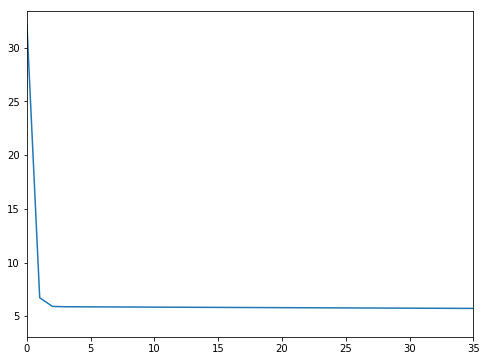

In [10]:
plt.figure(figsize=(8, 6))
N_iterations = np.array(range(len(J_cost)))
plt.plot(N_iterations,J_cost)
plt.xlim((0.0,100.0))
plt.xlim((0.0,35.0))

(-5.0, 25.0)

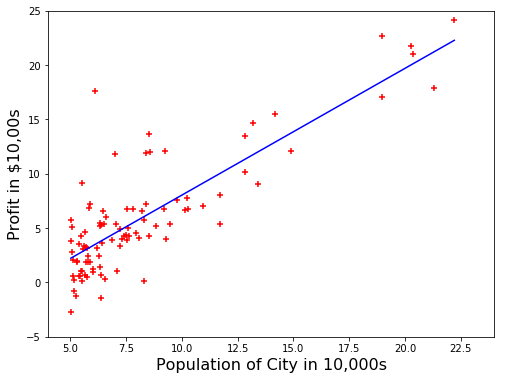

In [11]:
x_vals_fit = np.arange( np.min(X_train), np.max(X_train) + 0.01, 0.01 )
x_vals_fit = x_vals_fit.reshape(len(x_vals_fit),1)
y_vals_fit = predicted_values( bias = learned_params["bias"] , weights = learned_params["weights"], X_data = x_vals_fit )
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, marker = "+", color = "red")
plt.plot( x_vals_fit, y_vals_fit, color="blue" )
plt.xlabel("Population of City in 10,000s", fontsize = 16)
plt.ylabel("Profit in $10,00s", fontsize = 16)
plt.xlim((4.0,24.0))
plt.ylim((-5.0,25.0))

## Learning Parameters with the Normal Equation


In [12]:
def normal_eqn( X_data, y_data ):
    
    # Adding a column of ones to X_data for the bias feature
    X_data = np.column_stack( ( np.ones( ( X_train.shape[0], 1 ) )  , X_train ) )
    
    inv_matrix = np.linalg.pinv( np.dot( X_data.T, X_data ) )
    
    weights = np.dot( np.dot( inv_matrix, X_data.T ) , y_data )
    
    # Putting the learned parameters into a dictionary
    learned_params = { "weights": weights[1:,0], "bias": weights[0,0] }
    
    # Returning the learned parameters with the normal equation
    return learned_params
    

Comparing the parameters learned by the normal equation to the parameters learned by gradient descent.

In [13]:
normal_eq_params = normal_eqn( X_train , y_train )
print( normal_eq_params["bias"] )
print( learned_params["bias"] )
print( normal_eq_params["weights"] )
print( learned_params["weights"] )

-3.89578087831
-3.63077000956
[ 1.19303364]
[[ 1.16641043]]


# Linear Regression with Multiple Variables

Loading data from text file into a numpy ndarray.

In [14]:
exercise_2_data = np.genfromtxt("ex1data2.txt", delimiter=",", dtype = float)
print(exercise_2_data.shape)
exercise_2_data[0:5]

(47, 3)


array([[  2.10400000e+03,   3.00000000e+00,   3.99900000e+05],
       [  1.60000000e+03,   3.00000000e+00,   3.29900000e+05],
       [  2.40000000e+03,   3.00000000e+00,   3.69000000e+05],
       [  1.41600000e+03,   2.00000000e+00,   2.32000000e+05],
       [  3.00000000e+03,   4.00000000e+00,   5.39900000e+05]])

Creating training data matrix X and target values y

In [15]:
X_train = exercise_2_data[:, 0:2 ]
print(X_train.shape)
X_train[0:5]

(47, 2)


array([[  2.10400000e+03,   3.00000000e+00],
       [  1.60000000e+03,   3.00000000e+00],
       [  2.40000000e+03,   3.00000000e+00],
       [  1.41600000e+03,   2.00000000e+00],
       [  3.00000000e+03,   4.00000000e+00]])

In [16]:
y_train = exercise_2_data[:,-1] 
y_train = y_train.reshape( (len(y_train),1) )
print(y_train.shape)
y_train[0:5]

(47, 1)


array([[ 399900.],
       [ 329900.],
       [ 369000.],
       [ 232000.],
       [ 539900.]])

## Feature Normatization or Feature Scaling

Building a function to perform feature scalling. This will allow gradient descent to converge more quickly.

In [17]:
def normalize_features( X_data ):
    
    X_data_norm =  np.zeros( X_data.shape )
    
    mean_std_features = {}
    
    for i in range( X_data.shape[1] ):
        
        X_i_mean = np.mean( X_data[:,i] )
        X_i_std = np.std( X_data[:,i] )
        
        X_data_norm[:,i] = ( X_data[:,i] - X_i_mean )/X_i_std
        
        mean_std_features[str(i)] = np.array([X_i_mean, X_i_std])
        
        
    return X_data_norm, mean_std_features

In [18]:
X_train_norm, X_mean_std_train_feats = normalize_features( X_train )
y_train_norm, y_mean_std_train_feats = normalize_features( y_train )

## Multivariable Gradient Descent

Plotting the cost function for several values of the learning rate.

/Users/rodolfosantana/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: overflow encountered in square


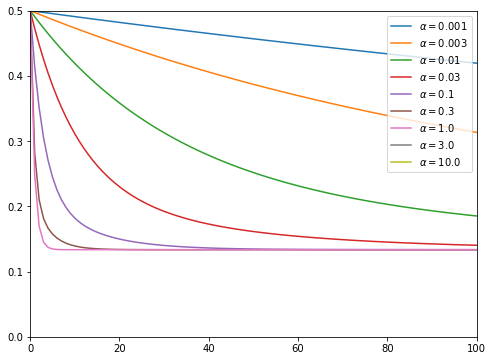

In [19]:
plt.figure(figsize=(8, 6))

learn_rate_vals = np.array([ 1.0e-3, 3.0e-3, 1.0e-2, 3.0e-2, 1.0e-1, 3.0e-1, 1.0, 3.0, 10.0])

for i in range(len(learn_rate_vals)):
    learned_params, J_cost = grad_desc( X_data = X_train_norm, y_data = y_train_norm, 
                                        N_iterations = 1000, learning_rate = learn_rate_vals[i])
    
    N_iterations = np.array(range(len(J_cost)))
    plt.plot(N_iterations,J_cost, label = r"$\alpha = $" + str(learn_rate_vals[i]))
    
    
plt.xlim((0.0,100.0))
plt.ylim((0.0,0.5))
plt.legend(loc="upper right")

Choosing the learning rate with the fastest convergence

{'weights': array([[ 0.88476599],
       [-0.05317882]]), 'bias': -9.4487065925542071e-17}


(0.0, 50.0)

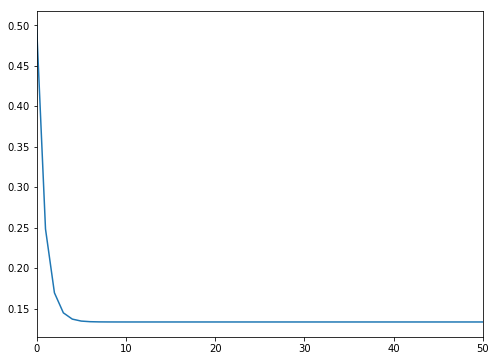

In [20]:
learned_params_feat_scaled, J_cost = grad_desc( X_data = X_train_norm, y_data = y_train_norm, 
                                   N_iterations = 1000, learning_rate = 1.0)
print( learned_params_feat_scaled )

plt.figure(figsize=(8, 6))
N_iterations = np.array(range(len(J_cost)))
plt.plot(N_iterations,J_cost)
plt.xlim((0.0,50.0))

## Learning Parameters with the Normal Equation

We do not need to apply feature scaling to learn the weights with the normal equation.

In [21]:
normal_eq_params = normal_eqn( X_train , y_train )
print( normal_eq_params["bias"] )
print( normal_eq_params["weights"] )

89597.9095436
[  139.21067402 -8738.01911255]


Getting the mean and standard deviation values from the dataset to rescale the weights learned with feature scaling to compare to the weights learned by the normal equation (with no feature scaling).

In [22]:
mean_x1 = X_mean_std_train_feats['0'][0]
mean_x2 = X_mean_std_train_feats['1'][0]
mean_y = y_mean_std_train_feats['0'][0]
sigma_x1 = X_mean_std_train_feats['0'][1]
sigma_x2 = X_mean_std_train_feats['1'][1]
sigma_y = y_mean_std_train_feats['0'][1]
b_feat_scaled = learned_params_feat_scaled["bias"]
w1_feat_scaled = learned_params_feat_scaled["weights"][0]
w2_feat_scaled = learned_params_feat_scaled["weights"][1]

In the equation below $w_{1}$ is the weight learned for the first feature with the normal equation without feature scaling and $w_{1} ^{\prime}$ is the weight learned for the first feature with gradient descent with feature scaling.

$$ w_{1} = \frac{\sigma_{y}}{\sigma_{x1}} w_{1} ^{\prime} $$

In [23]:
print(normal_eq_params["weights"][0])
print( float( (sigma_y/sigma_x1)*w1_feat_scaled ) )

139.210674018
139.21067401762554


In the equation below $w_{2}$ is the weight learned for the second feature with the normal equation without feature scaling and $w_{2} ^{\prime}$ is the weight learned for the second feature with gradient descent with feature scaling.

$$ w_{2} = \frac{\sigma_{y}}{\sigma_{x1}} w_{2} ^{\prime} $$

In [24]:
print(normal_eq_params["weights"][1])
print( float( (sigma_y/sigma_x2)*w2_feat_scaled ) )

-8738.01911255
-8738.019112327835
